# Collecting Data: Assignment 4

> Please refer to this Assignment's [Github repository](https://github.com/NygmaPI/CD-3/tree/main) for additional information.

## Dataset
### Individuals of Irish ancestry (count)

This projects makes use of the "[Individuals of Irish ancestry (American Community Survey 1-Year Summary Files)]((https://data.diversitydatakids.org/dataset/04006_5_c-individuals-of-irish-ancestry--count-))" provided by  DDK ([diversitydatakids.org](https://www.diversitydatakids.org/)) and it is a project of the Institute for Child, Youth and Family Policy at Brandeis University.

> American Community Survey 1-Year Summary Files, 2009-2017, Table(s): B04006. American Community Survey 5-Year Summary Files, 2009-2017, Table(s): B04006.

> [diversitydatakids.org](https://www.diversitydatakids.org/). 2021. “Individuals of Irish ancestry (count)”, retrieved from https://data.diversitydatakids.org/dataset/04006_5_c-individuals-of-irish-ancestry--count-?_external=True on Dec 07 2023, calculated from American Community Survey Summary Files

___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_rows = 200

## Get Data

For this assignment, we will only use the "040_States_1-Year.csv" file.

In [3]:
irish_df = pd.read_csv(r"C:\Users\Startklaar\Documents\Digital Humanities\Collecting Data\Week 4\Assignment 4\Irish-American Census Data\040_States_1-Year.csv", 
                       delimiter=",", encoding="utf-8")

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#DataFrame) — often abbreviated as *df*, e.g., *irish_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [4]:
irish_df.sample(10)

,geoid,name,year,total_est,total_se
94,04000US15,Hawaii,2015,61944,3017.0212
349,04000US48,Texas,2015,1807670,18576.2910
217,04000US30,Montana,2016,145425,3837.0820
106,04000US17,Illinois,2010,1598702,18081.4590
232,04000US32,Nevada,2014,254390,6018.8452
149,04000US21,Kentucky,2017,501924,10203.6470
197,04000US27,Minnesota,2011,573204,8091.7935
75,04000US12,Florida,2011,1869199,20770.8200
259,04000US35,New Mexico,2015,126384,4420.6685
89,04000US13,Georgia,2016,778971,13179.3310


Generate information about all the columns in the data 

In [5]:
irish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   geoid      398 non-null    object 
 1   name       398 non-null    object 
 2   year       398 non-null    int64  
 3   total_est  398 non-null    int64  
 4   total_se   398 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 15.7+ KB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'total_est'}>],
       [<Axes: title={'center': 'total_se'}>, <Axes: >]], dtype=object)

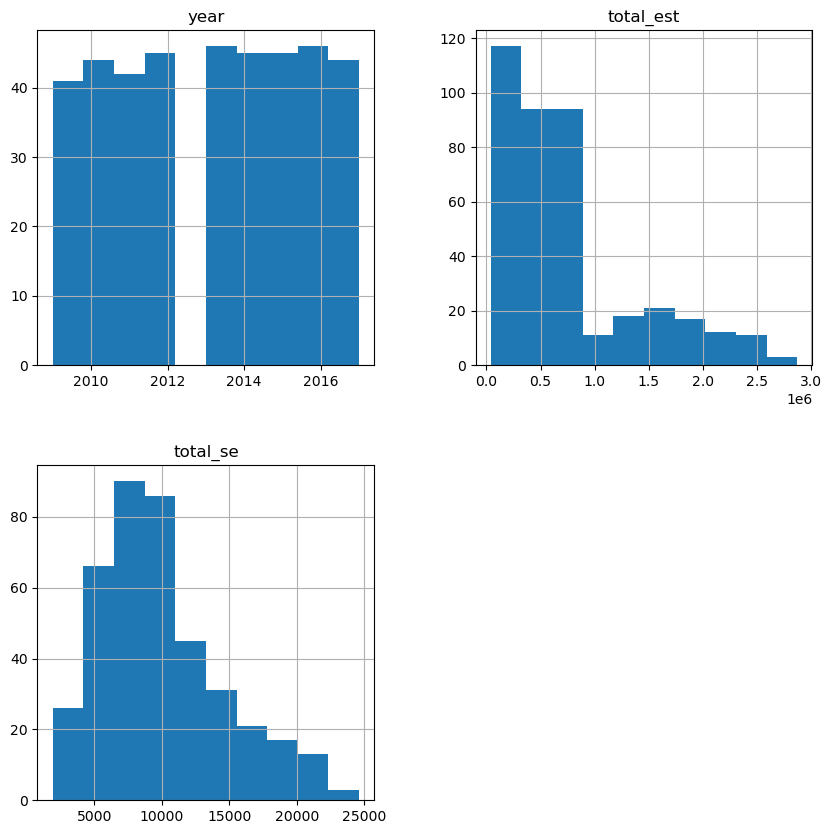

In [6]:
irish_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [7]:
irish_df.describe(include='all')

,geoid,name,year,total_est,total_se
count,398,398,398.000000,3.980000e+02,398.000000
unique,48,48,NaN,NaN,NaN
top,04000US01,Alabama,NaN,NaN,NaN
freq,9,9,NaN,NaN,NaN
mean,NaN,NaN,2013.060302,7.441269e+05,9924.798765
std,NaN,NaN,2.562347,6.313612e+05,4612.906883
min,NaN,NaN,2009.000000,4.017700e+04,1927.659500
25%,NaN,NaN,2011.000000,2.744900e+05,6596.656475
50%,NaN,NaN,2013.000000,5.721430e+05,9067.781250
75%,NaN,NaN,2015.000000,8.567132e+05,12581.003000


## Drop Rows

In [8]:
irish_df[irish_df['total_se'] > 20000]

,geoid,name,year,total_est,total_se
29,04000US06,California,2009,2870349,23486.930
31,04000US06,California,2011,2598503,24608.510
32,04000US06,California,2012,2529571,20586.018
34,04000US06,California,2014,2482084,21651.064
35,04000US06,California,2015,2482190,21939.818
36,04000US06,California,2016,2413135,21474.164
73,04000US12,Florida,2009,1996800,20947.721
75,04000US12,Florida,2011,1869199,20770.820
76,04000US12,Florida,2012,1791102,20556.230
262,04000US36,New York,2009,2648949,22717.326


## Scatter Plots and Line Plots

In [9]:
irish_df.groupby('name')['total_est'].sum().reset_index()

,name,total_est
0,Alabama,3953691
1,Alaska,145860
2,Arizona,5621517
3,Arkansas,2951614
4,California,22805683
5,Colorado,5624505
6,Connecticut,5137070
7,Delaware,1213329
8,District of Columbia,392451
9,Florida,16335711


In [10]:
state_census = irish_df.groupby('name')['total_est'].sum().reset_index()

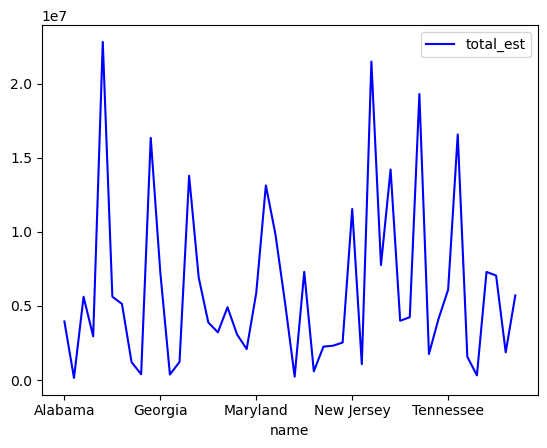

In [11]:
ax = state_census.plot(kind='line', x='name', y='total_est', color='blue')

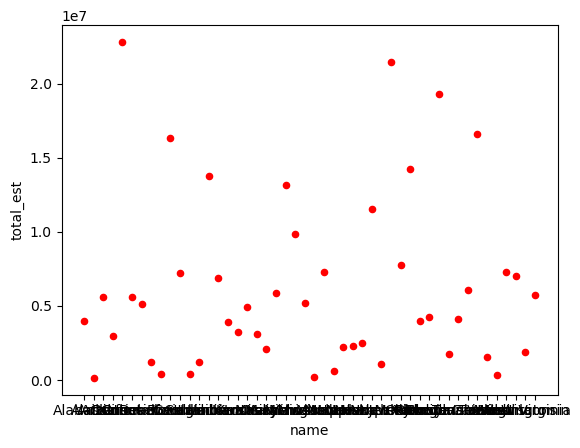

In [12]:
ax = state_census.plot(kind='scatter', x='name', y='total_est', color='red')